<a href="https://colab.research.google.com/github/Roniyek/Machine-learning/blob/main/makine_ogrenmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Çoklu Doğrusal Regresyon Katsayıları: [ 0.07379726  0.18212686 -0.01615283  0.0152169  -0.00509628  0.08563135
  0.05266221  0.02509427]
Çoklu Doğrusal Regresyon Kesme Noktası: 0.34888059701492535
Çoklu Doğrusal Regresyon Ortalama Kare Hatası (MSE): 0.1552996314494885

Multinominal Lojistik Regresyon Katsayıları: [[ 0.20371352  0.52919351 -0.04072971  0.03412051 -0.02631085  0.3006076
   0.16506467  0.07872437]]
Multinominal Lojistik Regresyon Kesme Noktası: [-0.42982353]
Multinominal Lojistik Regresyon Doğruluk Oranı: 0.7922077922077922
Eşik değeri 0.5 için Doğruluk Oranı: 0.7922077922077922
Naive Bayes Sınıflandırıcı için Hassasiyet (Sensitivity): 0.5125
Naive Bayes Sınıflandırıcı için Özgünlük (Specificity): 0.8344370860927153

Naive Bayes Sınıflandırıcı Test Seti için Konfüzyon Matrisi:
[[126  25]
 [ 39  41]]

Naive Bayes Sınıflandırıcı Test Seti için Hassasiyet (Sensitivity): 0.5125
Naive Bayes Sınıflandırıcı Test Seti için Özgünlük (Specificity): 0.8344370860927153
Naive Bayes Sı

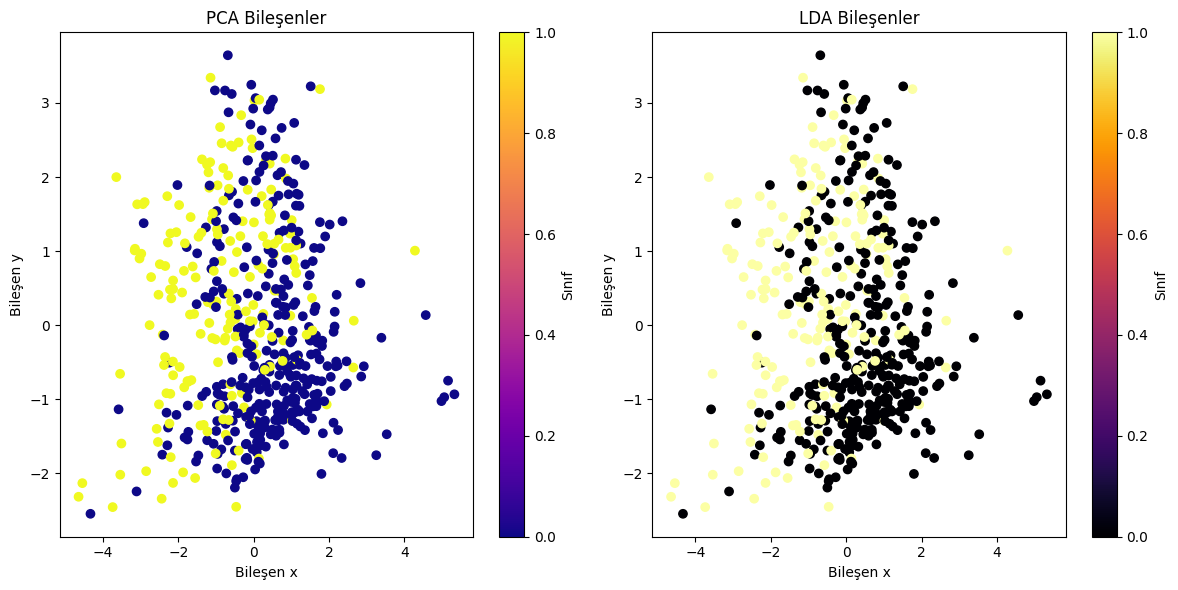

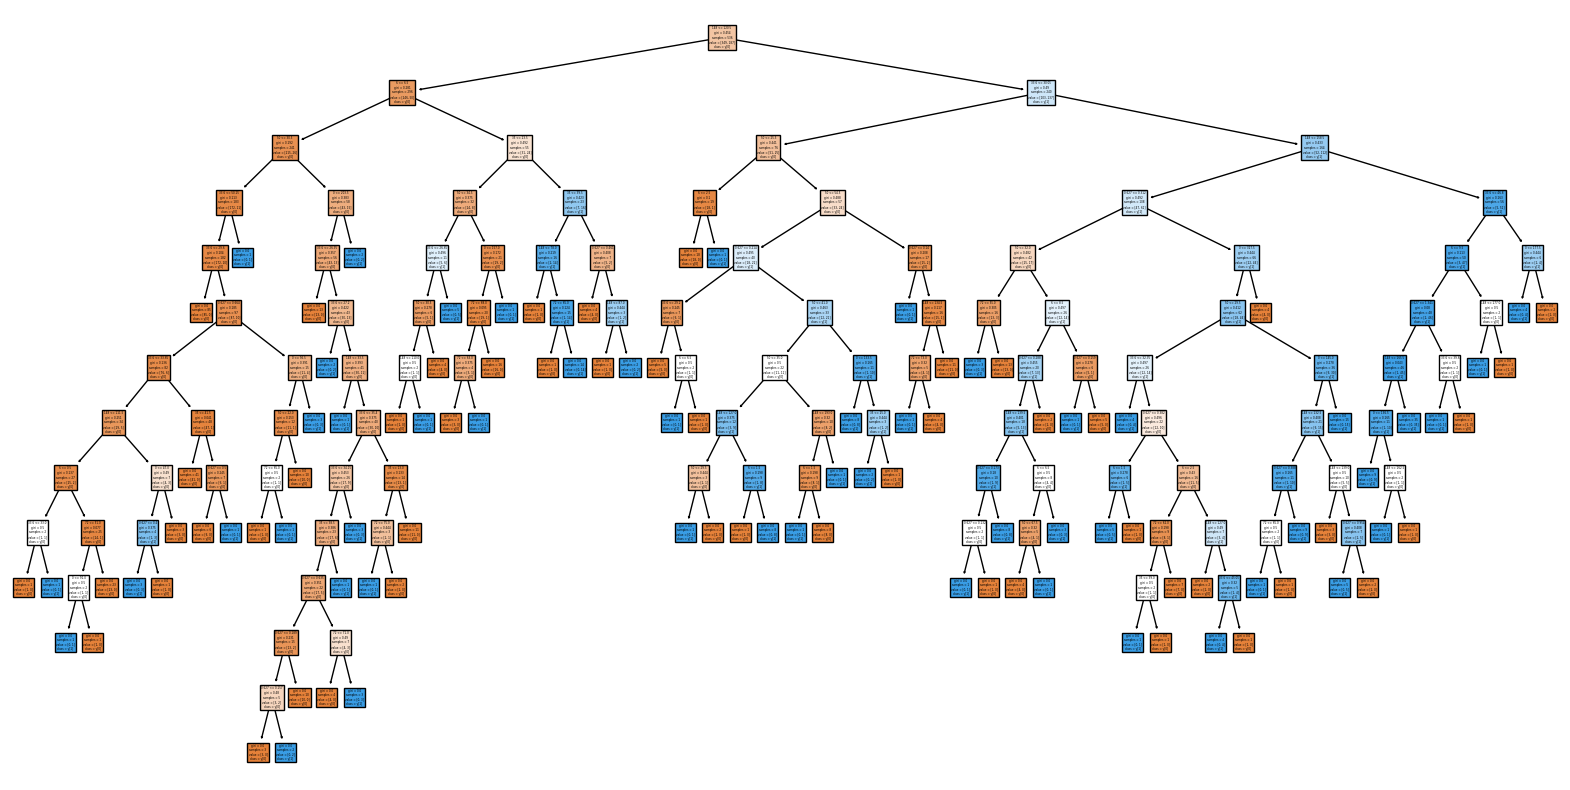

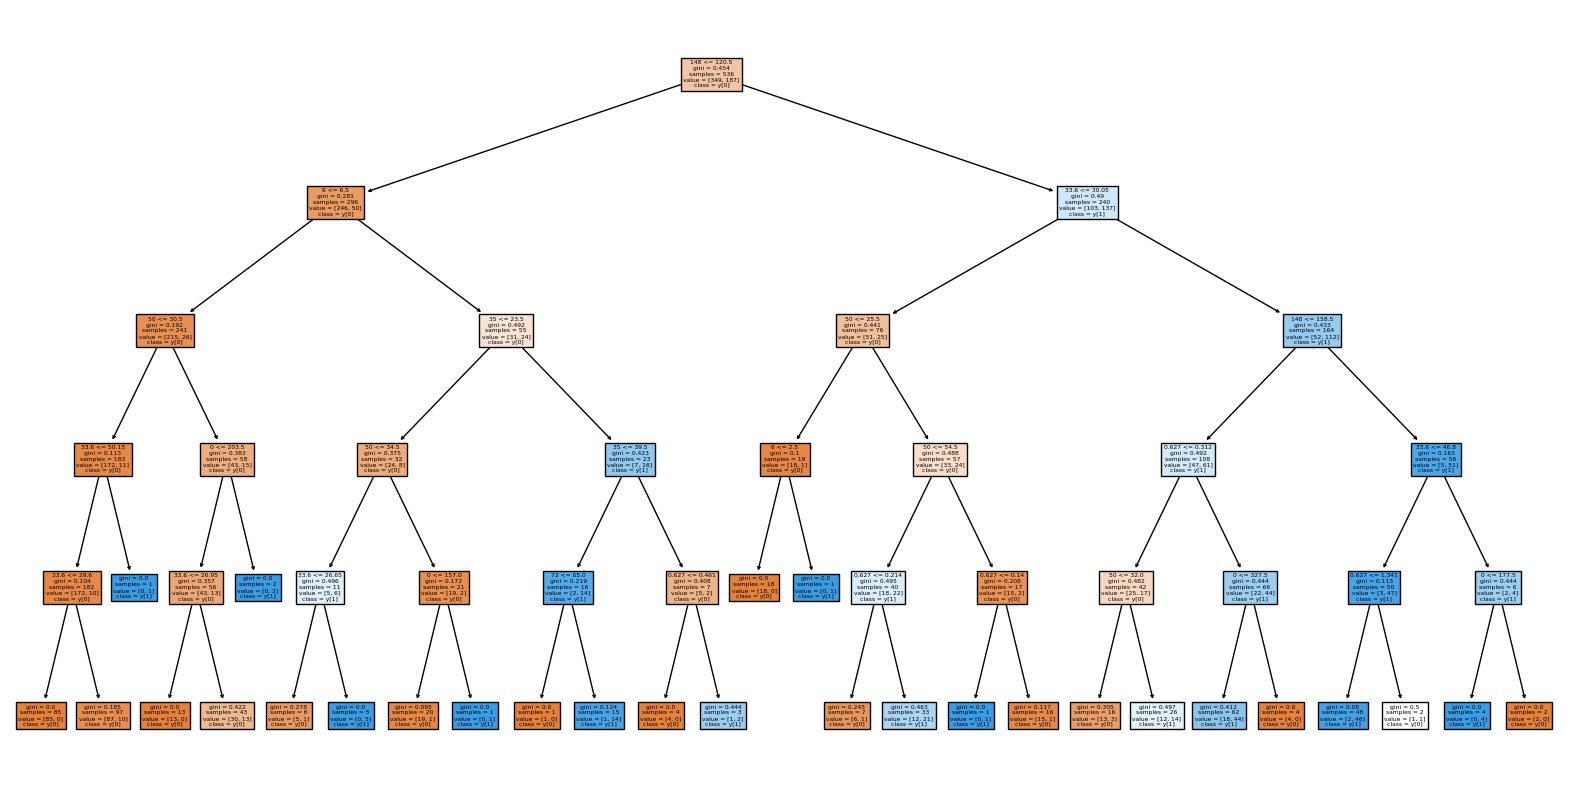

Karar Ağacı Sınıflandırma Doğruluk Oranı: 0.6926406926406926

Karar Ağacı Sınıflandırma Karmaşıklık Matrisi:
 [[114  37]
 [ 34  46]]

Karar Ağacı Sınıflandırma Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.57      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.70      0.69      0.69       231

Karar Ağacı Sınıflandırma Doğruluk Oranı: 0.6926406926406926

Karar Ağacı Sınıflandırma Karmaşıklık Matrisi:
 [[114  37]
 [ 34  46]]

Karar Ağacı Sınıflandırma Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.57      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.70      0.69  

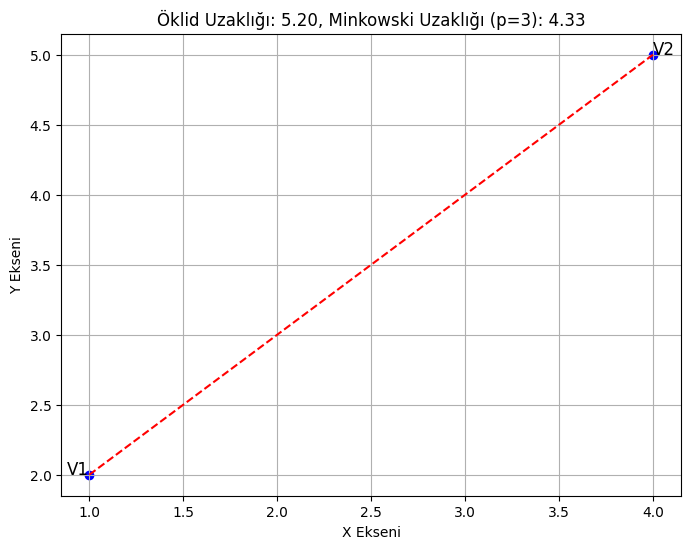


Özniteliklerin Ortalamaları:
6          3.842243
148      120.859192
72        69.101695
35        20.517601
0         79.903520
33.6      31.990482
0.627      0.471674
50        33.219035
dtype: float64

Özniteliklerin Standart Sapmaları:
6          3.370877
148       31.978468
72        19.368155
35        15.954059
0        115.283105
33.6       7.889091
0.627      0.331497
50        11.752296
dtype: float64
t-statistic: -100.78346383748956
p-value: 0.0
İki grup arasında istatistiksel olarak anlamlı bir fark vardır (H0 reddedildi).
t-statistic: -1.6316865598038936e-15
p-value: 0.9999999999999987
İki grup arasında istatistiksel olarak anlamlı bir fark yoktur (H0 kabul edildi).


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns

# Metin dosyasından veri okuma
file_path = "veri-seti.csv"
df = pd.read_csv(file_path, delimiter="\t")

X = df.iloc[:, :-1]  # Hedef değişken hariç tüm öznitelikler
y = df.iloc[:, -1]   # Hedef değişken (son sütun)

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizasyon işlemi
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Çoklu Doğrusal Regresyon Analizi
linear_reg = LinearRegression()
linear_reg.fit(X_train_normalized, y_train)
linear_coef = linear_reg.coef_
linear_intercept = linear_reg.intercept_
linear_predictions = linear_reg.predict(X_test_normalized)
linear_mse = mean_squared_error(y_test, linear_predictions)

print("Çoklu Doğrusal Regresyon Katsayıları:", linear_coef)
print("Çoklu Doğrusal Regresyon Kesme Noktası:", linear_intercept)
print("Çoklu Doğrusal Regresyon Ortalama Kare Hatası (MSE):", linear_mse)

# Multinominal Lojistik Regresyon Analizi
logistic_reg = LogisticRegression(multi_class='multinomial', max_iter=1000)
logistic_reg.fit(X_train_normalized, y_train)
logistic_coef = logistic_reg.coef_
logistic_intercept = logistic_reg.intercept_
logistic_predictions = logistic_reg.predict(X_test_normalized)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

print("\nMultinominal Lojistik Regresyon Katsayıları:", logistic_coef)
print("Multinominal Lojistik Regresyon Kesme Noktası:", logistic_intercept)
print("Multinominal Lojistik Regresyon Doğruluk Oranı:", logistic_accuracy)

# Eşik değeri belirleme
threshold = 0.5

# Lojistik regresyon modeli ile tahmin olasılıklarını alma
logistic_probabilities = logistic_reg.predict_proba(X_test_normalized)

# Olasılıkları eşik değeriyle sınıflara dönüştürme
y_pred_threshold = (logistic_probabilities[:, 1] >= threshold).astype(int)

# Eşik değeriyle elde edilen tahminler için doğruluk hesaplama
threshold_accuracy = accuracy_score(y_test, y_pred_threshold)

print(f"Eşik değeri {threshold} için Doğruluk Oranı:", threshold_accuracy)


# Naive Bayes Sınıflandırıcısı
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Test seti üzerinde tahminleri alın
y_pred_test_nb = nb_classifier.predict(X_test)

# Konfüzyon Matrisi
conf_matrix_nb = confusion_matrix(y_test, y_pred_test_nb)

# Hassasiyet, Özgünlük, Doğruluk, F1 Skoru
tn, fp, fn, tp = conf_matrix_nb.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy_nb = accuracy_score(y_test, y_pred_test_nb)
f1_score_nb = classification_report(y_test, y_pred_test_nb, output_dict=True)['weighted avg']['f1-score']

print("Naive Bayes Sınıflandırıcı için Hassasiyet (Sensitivity):", sensitivity)
print("Naive Bayes Sınıflandırıcı için Özgünlük (Specificity):", specificity)
print("\nNaive Bayes Sınıflandırıcı Test Seti için Konfüzyon Matrisi:")
print(conf_matrix_nb)
print("\nNaive Bayes Sınıflandırıcı Test Seti için Hassasiyet (Sensitivity):", sensitivity)
print("Naive Bayes Sınıflandırıcı Test Seti için Özgünlük (Specificity):", specificity)
print("Naive Bayes Sınıflandırıcı Test Seti için Doğruluk (Accuracy):", accuracy_nb)
print("Naive Bayes Sınıflandırıcı Test Seti için F1 Skoru:", f1_score_nb)

# Eğitim seti üzerinde tahminleri alma
y_pred_train_nb = nb_classifier.predict(X_train)

# Eğitim seti için sınıflandırma raporu
print("\nNaive Bayes Sınıflandırıcı Eğitim Seti için Sınıflandırma Raporu:")
print(classification_report(y_train, y_pred_train_nb))

# Test seti üzerinde tahminleri alma
y_pred_test_nb = nb_classifier.predict(X_test)

# Test seti için sınıflandırma raporu
print("\nNaive Bayes Sınıflandırıcı Test Seti için Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_test_nb))

# Test seti için karışıklık matrisi
print("\nNaive Bayes Sınıflandırıcı Test Seti için Karışıklık Matrisi:")
print(confusion_matrix(y_test, y_pred_test_nb))

# PCA modeli oluşturma
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

cov_matrix = np.cov(X_train_normalized.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Özdeğerler pca:", eigenvalues)
print("Özvektörler pca:", eigenvectors)
# LDA modeli oluşturma
lda = LinearDiscriminantAnalysis(n_components=min(X_train_normalized.shape[1], len(set(y_train)) - 1))
X_train_lda = lda.fit_transform(X_train_normalized, y_train)
X_test_lda = lda.transform(X_test_normalized)
# Sınıf ortalamalarını hesaplama
class_means = np.mean(X_train_normalized, axis=0)
overall_mean = np.mean(X_train_normalized)

# Sınıf içi ve sınıf dışı dağılım matrislerini hesaplama
within_class_scatter_matrix = np.zeros((X_train_normalized.shape[1], X_train_normalized.shape[1]))
between_class_scatter_matrix = np.zeros((X_train_normalized.shape[1], X_train_normalized.shape[1]))

for c in np.unique(y_train):
    class_indices = np.where(y_train == c)
    class_data = X_train_normalized[class_indices]
    class_mean = np.mean(class_data, axis=0)

    # Sınıf içi dağılım matrisi
    within_class_scatter_matrix += (class_data - class_mean).T.dot(class_data - class_mean)

    # Sınıf dışı dağılım matrisi
    between_class_scatter_matrix += len(class_data) * (class_mean - overall_mean).reshape(-1, 1).dot((class_mean - overall_mean).reshape(1, -1))

# Özdeğer ve özvektörleri hesaplama
eigenvalues_lda, eigenvectors_lda = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

print("LDA Özdeğerler:", eigenvalues_lda)
print("LDA Özvektörler:", eigenvectors_lda)



# PCA bileşenlerinin görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('PCA Bileşenler')
plt.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], c=y_train, cmap='plasma')  # Renk haritasını 'plasma' olarak değiştir
plt.xlabel('Bileşen x')
plt.ylabel('Bileşen y')
plt.colorbar(label='Sınıf')

# LDA bileşenlerinin görselleştirilmesi
plt.subplot(1, 2, 2)
plt.title('LDA Bileşenler')
plt.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], c=y_train, cmap='inferno')  # Renk haritasını 'inferno' olarak değiştir
plt.xlabel('Bileşen x')
plt.ylabel('Bileşen y')
plt.colorbar(label='Sınıf')

plt.tight_layout()
plt.show()

# Karar Ağacı Sınıflandırma Modeli
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Ağaç yapısını görselleştirme
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=True)
plt.show()
# Karar Ağacı Sınıflandırma Modeli (Budama ile)
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)

# Ağaç yapısını görselleştirme
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=True)
plt.show()

# Test verisi için kestirim
y_pred = dt_classifier.predict(X_test)

n_components = min(X.shape[1], len(y.unique()) - 1)
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_lda = lda.fit_transform(X, y)


# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Karar Ağacı Sınıflandırma Doğruluk Oranı:", accuracy)
print("\nKarar Ağacı Sınıflandırma Karmaşıklık Matrisi:\n", conf_matrix)
print("\nKarar Ağacı Sınıflandırma Sınıflandırma Raporu:\n", class_report)

# Test verisi için kestirim
y_pred = dt_classifier.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Karar Ağacı Sınıflandırma Doğruluk Oranı:", accuracy)
print("\nKarar Ağacı Sınıflandırma Karmaşıklık Matrisi:\n", conf_matrix)
print("\nKarar Ağacı Sınıflandırma Sınıflandırma Raporu:\n", class_report)

# PCA için özniteliklerin önem sırasını belirleme
pca_components = pd.DataFrame(pca.components_, columns=X.columns)
print("\nPCA için özniteliklerin önem sırası:")
print(pca_components)

# LDA için özniteliklerin önem sırasını belirleme
lda_components = pd.DataFrame(lda.scalings_.T, columns=X.columns)
print("\nLDA için özniteliklerin önem sırası:")
print(lda_components)

# İki vektör arasındaki Öklid uzaklığını hesaplama
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))

# İki vektör arasındaki Minkowski uzaklığını hesaplama
def minkowski_distance(v1, v2, p):
    return np.power(np.sum(np.power(np.abs(v1 - v2), p)), 1/p)

# Örnek vektörler
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

# Öklid uzaklığı
euclidean_dist = euclidean_distance(v1, v2)

# Minkowski uzaklığı (p=3 için)
p_value = 3
minkowski_dist = minkowski_distance(v1, v2, p_value)
# Öklid ve Minkowski uzaklıklarını terminale yazdırma
print(f"Öklid Uzaklığı: {euclidean_dist}")
print(f"Minkowski Uzaklığı (p={p_value}): {minkowski_dist}")
# Görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter([v1[0], v2[0]], [v1[1], v2[1]], color='blue')  # Noktaları çiz
plt.plot([v1[0], v2[0]], [v1[1], v2[1]], '--', color='red')  # Noktalar arasındaki çizgiyi çiz
plt.text(v1[0], v1[1], 'V1', fontsize=12, ha='right')  # Vektörleri etiketle
plt.text(v2[0], v2[1], 'V2', fontsize=12, ha='left')
plt.title(f"Öklid Uzaklığı: {euclidean_dist:.2f}, Minkowski Uzaklığı (p={p_value}): {minkowski_dist:.2f}")
plt.xlabel('X Ekseni')
plt.ylabel('Y Ekseni')
plt.grid(True)
plt.show()
# Veri setinin ortalama ve standart sapma değerlerini hesaplama
feature_means = X.mean()
feature_std = X.std()

print("\nÖzniteliklerin Ortalamaları:")
print(feature_means)

print("\nÖzniteliklerin Standart Sapmaları:")
print(feature_std)


# İki özellik (sütun) seçme
column1 = X.iloc[:, 0]  # İlk sütun
column2 = X.iloc[:, 1]  # İkinci sütun

# t-testi uygulama
t_statistic, p_value = ttest_ind(column1, column2)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# p-value değerini yorumlama
alpha = 0.05
if p_value < alpha:
    print("İki grup arasında istatistiksel olarak anlamlı bir fark vardır (H0 reddedildi).")
else:
    print("İki grup arasında istatistiksel olarak anlamlı bir fark yoktur (H0 kabul edildi).")
# İki özellik (sütun) seçme
column1 = X.iloc[:, 0]  # İlk sütun
column2 = X.iloc[:, 1]  # İkinci sütun

# Normalizasyon
scaler = StandardScaler()
column1_normalized = scaler.fit_transform(column1.values.reshape(-1, 1)).flatten()
column2_normalized = scaler.fit_transform(column2.values.reshape(-1, 1)).flatten()

# t-testi uygulama
t_statistic, p_value = ttest_ind(column1_normalized, column2_normalized)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# p-value değerini yorumlama
alpha = 0.05
if p_value < alpha:
    print("İki grup arasında istatistiksel olarak anlamlı bir fark vardır (H0 reddedildi).")
else:
    print("İki grup arasında istatistiksel olarak anlamlı bir fark yoktur (H0 kabul edildi).")

